<a href="https://colab.research.google.com/github/anubrata01/Data-mining-college-Assignment/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset

**Dataset Description**
<br>
Overview
<br>
The data has been split into two groups:
<br>

* training set (train.csv)
* test set (test.csv)
<br>
This dataset is all the details about pasenges who servived and who died in the accident.

In [1]:
import pandas as pd
import warnings


In [2]:
warnings.filterwarnings('ignore')

## Importing datasets

In [3]:
data_train = pd.read_csv('/content/drive/MyDrive/dataset/titanic dataset/titanic/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/dataset/titanic dataset/titanic/test.csv')

## Get to know the dataset

In [4]:
data_train.head() # To ovserve 1st few rows.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.shape # To know the shape of the dataset.

(891, 12)

**Train dataset contains 12 columns and 891 rows**

In [6]:
data_train.info() # To know the information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print(f"Survived :{data_train['Survived'].unique()}")
print(f"Pclass :{data_train['Pclass'].unique()}")
print(f"Sex :{data_train['Sex'].unique()}")

Survived :[0 1]
Pclass :[3 1 2]
Sex :['male' 'female']


**There is 3 type of Datatypes**
1. int = Numarical
2. object = Catagorical(Survived is also a catagorical even it dtype is init)
3. Mixed = this are neither fall into Numarical or Catagorical such as "name","Ticket",We can not perform numerical or catagorical on them. We will discuss about it later.
<br>
**Lets seperate the attributes**
* Numerical = passengerId,Age,Sibsp,Parch,Fare
* Catagorical = Sex,Survived,Pclass,Cabin,Embarked
* mixed = Name,Ticket


**Notes**
- Even if Pclass and Survived is int datatype but they fall in catagoricals because they have catagory like class have(1,2,3) , and for servived it have (0,1)


In [8]:
# storing catagorical in different datafame
catagorical = data_train[['Survived','Pclass','Sex','Cabin','Embarked']]
# Storing numerical in the numerical dataframe
numerical = data_train[['PassengerId','Age','SibSp','Parch','Fare']]

In [9]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Same column as train dataset**

### Checking the Null values

In [10]:
for i in data_train.columns:
  print(f"{i} : {data_train[i].isnull().sum()}")

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


**Observation**
- Age, Cabin , Embarked have missing values.
- Embarked is will not cause any problem because only 2 missing value. But Age can cause problem , Hence we will handle missing values later.
- But for cabin we will ignore missing values to try to observer with all we got in cabin.Replacing might cause problem in the dataset.

In [11]:
for i in data_test.columns:
  print(f"{i} : {data_test[i].isnull().sum()}")

PassengerId : 0
Pclass : 0
Name : 0
Sex : 0
Age : 86
SibSp : 0
Parch : 0
Ticket : 0
Fare : 1
Cabin : 327
Embarked : 0


more of less same for the test dataset , age and cabin have missing values.

## EDA (Exploratry data analysis)


### Univariate Analysis for catagorical

**Univarite analysis includes**
- For Catagorical
  - Frequency Distribution
  -pie chart
  - value counts

#### Frequency Distribution

In [12]:
catagorical.columns

Index(['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked'], dtype='object')

In [13]:
catagorical['Survived'].value_counts()

,count
Survived,
0,549
1,342


**graph**

In [14]:
import matplotlib.pyplot as plt

<Axes: xlabel='Survived'>

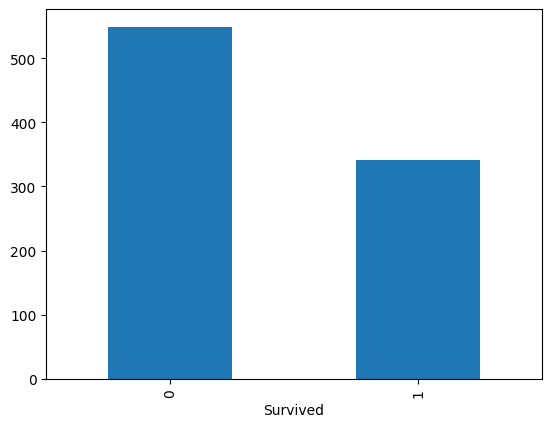

In [15]:
catagorical['Survived'].value_counts().plot(kind='bar')

In [16]:
catagorical['Pclass'].value_counts().sort_values()

,count
Pclass,
2,184
1,216
3,491


**Graph**

<Axes: xlabel='Pclass'>

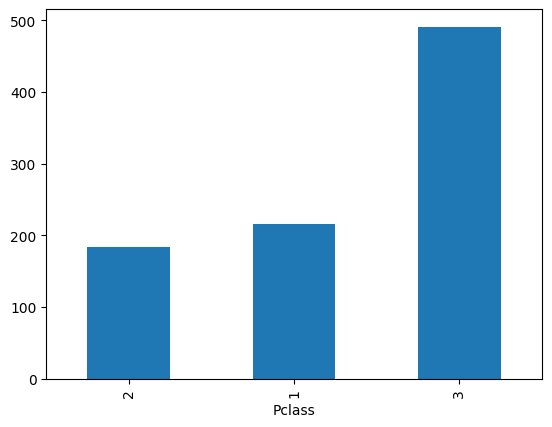

In [17]:
catagorical['Pclass'].value_counts().sort_values().plot(kind='bar')

**Observation**
- class 3 have more pasengers
- then class 1 have more pasengers , generally after class 3 , class 2 should have most pasengers , but didn't happen so maybe **fair price** can be responsible.

In [18]:
catagorical['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex'>

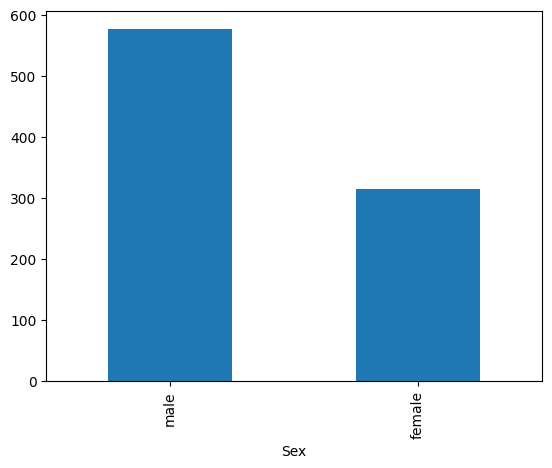

In [19]:
catagorical['Sex'].value_counts().plot(kind='bar')

**Male dominated dataset**

In [20]:
catagorical['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In the **Titanic dataset**, the "Embarked" column indicates the port where a passenger boarded the ship.
- "C" representing Cherbourg
- "Q" representing Queenstown (now Cobh, Ireland)
- "S" representing Southampton.

<Axes: xlabel='Embarked'>

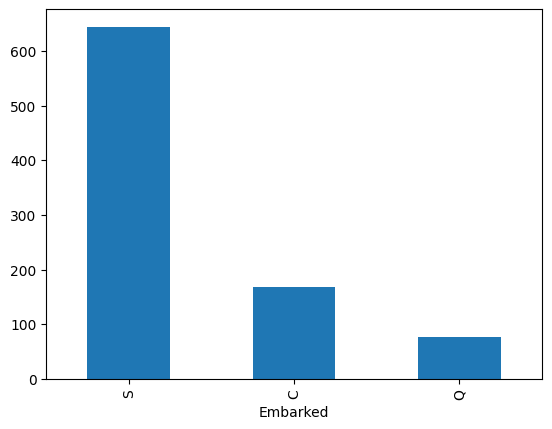

In [21]:
catagorical['Embarked'].value_counts().plot(kind='bar')

as titanic started from Southampton, England, "s" have most pasengers.

In [22]:
catagorical['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


Cabin can be confusing so we will drop kebin coulmn. because cabin neither catagorical or numerical. It falls into mixed caatagory . have so many null values . Hence we will drop this column.

In [23]:
catagorical.drop('Cabin',axis=1,inplace=True)

#### Pie chart

<Axes: ylabel='count'>

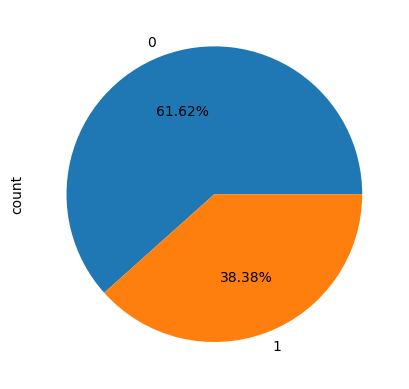

In [24]:
catagorical['Survived'].value_counts().plot(kind='pie',autopct='%.2f%%')

only 38% people have survived.

<Axes: ylabel='count'>

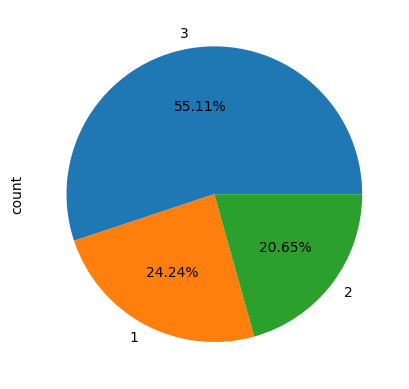

In [25]:
catagorical['Pclass'].value_counts().plot(kind='pie',autopct='%.2f%%')

- 3 rd class have most = 55%
- 1 st class have 2nd height = 24%
- 2 nd class have 3rd height = 20%

<Axes: ylabel='count'>

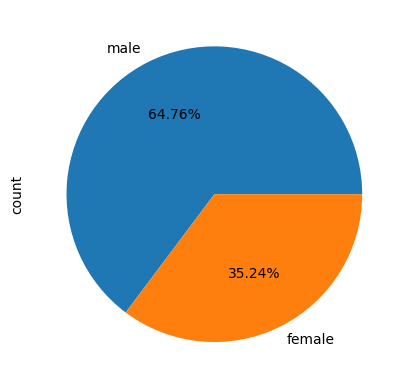

In [26]:
catagorical['Sex'].value_counts().plot(kind='pie',autopct='%.2f%%')

### Univarite for Numerical

**This includes**
- Mean, median ,mode,range
- histogram, boxplot(to detect outlier)

#### Age

<Axes: ylabel='Density'>

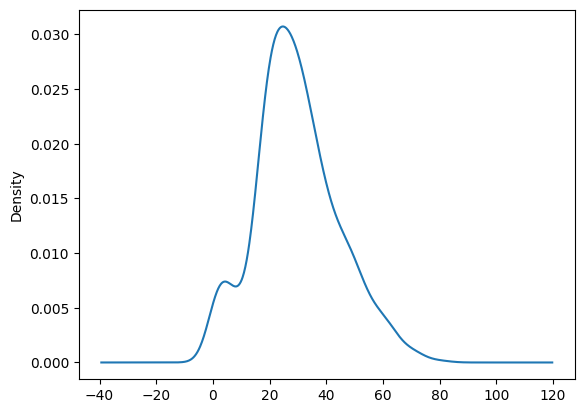

In [27]:
numerical['Age'].plot(kind = 'kde')

'Age' columns distribution is very close to normal distribution.

<Axes: >

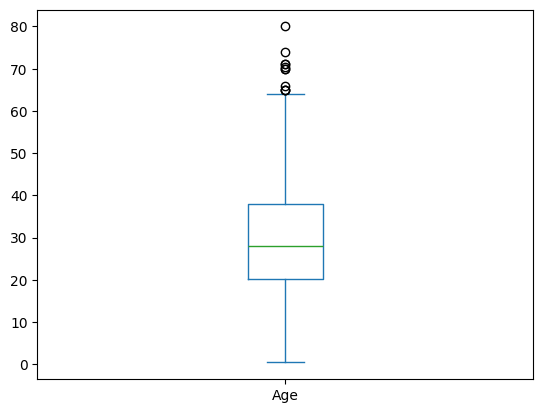

In [28]:
numerical['Age'].plot(kind='box')

We can assume from this box plot that , above 65 seems outliers.let's take a look at the dataset why they are outliers.

In [29]:
numerical[numerical['Age'] >= 70]

,PassengerId,Age,SibSp,Parch,Fare
96,97,71.0,0,0,34.6542
116,117,70.5,0,0,7.7500
493,494,71.0,0,0,49.5042
630,631,80.0,0,0,30.0000
672,673,70.0,0,0,10.5000
745,746,70.0,1,1,71.0000
851,852,74.0,0,0,7.7750


In [30]:
numerical['Age'].skew()

0.38910778230082704

**Conclusion**<br>
**After analysing dataset, outliers are not beacuse of any input error but there are people on titanic whose age is more than 65.**

#### Fare

<Axes: ylabel='Density'>

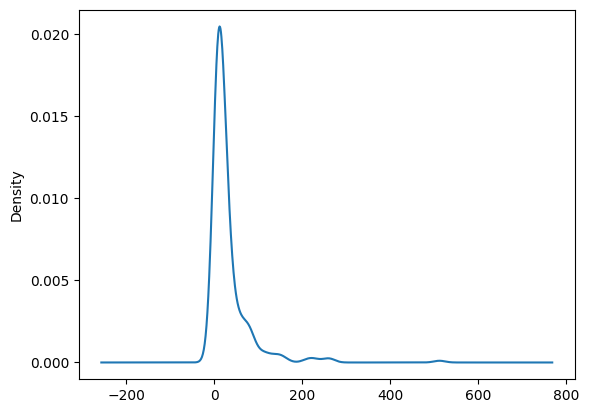

In [31]:
numerical['Fare'].plot(kind = 'kde')

This is posetively skewed . Means outliers will be at the right side.<br> Which means there are people who paid more than 200 doller.

<Axes: >

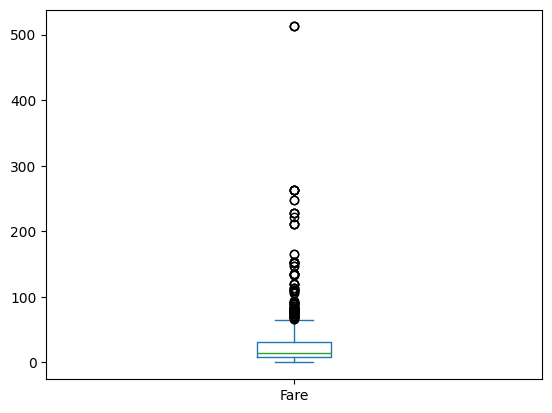

In [32]:
numerical['Fare'].plot(kind='box')

There are too many outliers. And among the passengers some one payed 500 doller.

*Let look at the dataset*

In [33]:
numerical[(numerical['Fare']>200) & (numerical['Fare']<500)]

,PassengerId,Age,SibSp,Parch,Fare
27,28,19.0,3,2,263.0000
88,89,23.0,3,2,263.0000
118,119,24.0,0,1,247.5208
299,300,50.0,0,1,247.5208
311,312,18.0,2,2,262.3750
341,342,24.0,3,2,263.0000
377,378,27.0,0,2,211.5000
380,381,42.0,0,0,227.5250
438,439,64.0,1,4,263.0000
527,528,NaN,0,0,221.7792


**Conclusion**<br>
*From this we can conclude that it's not the price is $500. But Fare column shows total price paid ( if have family, it is not showing individuals price)<br>We will handle this by doing feature engineering.*

#### parch(parent Child)

In [34]:
numerical['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


There is a person who is traveling with 6 children.

In [35]:
data_train[data_train['Parch']==6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S


In [36]:
data_train[data_train['Name'].str.contains("Goodwin")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


**Conclusion**<br>
*There should be 8 members of "Goodwin" family. But here only 6 is showing , which means remaining members are in "Test dataset".*

In [37]:
numerical['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


kind of similar to Parch. So we will create a new column called family members.This will help us to train model.

### Bivarite Analysis

Important columns:(Sex,Class,Survived,Age)

#### Sex vs other columns

In [38]:
grouped = data_train.groupby(['Sex','Survived']).size().unstack()
print(grouped)

Survived    0    1
Sex               
female     81  233
male      468  109


By looking at this table, more female have survived then man.

In [39]:
grouped = data_train.groupby(['Pclass','Survived']).size().unstack()
print(grouped)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


Class 1 has a higher percentage of survivors.
<br>
Class 3 has the highest percentage of deaths.

In [40]:
grouped = data_train.groupby(['Pclass','Sex']).size().unstack()
print(grouped)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


In [41]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling Missing Values & Feature Engineering

#### Handle Missing value

We have missing Values for:
- Age
- Cabin
- Embark
<br>
Age is must have feature.
<br>
Cabin column can be dropped because there is too many missing values.
<br>
Embark have 2 missing values that can be handled as well.

##### Age

In [42]:
data_train['Age'].isnull().sum()

177

Fill missing values with mean value.

In [43]:
data_train['Age'].fillna(data_train['Age'].mean(),inplace=True)

In [44]:
data_train['Age'].isnull().sum()

0

All missing values are handled.

##### Cabin

In [45]:
data_train['Cabin'].isnull().sum()

687

In [46]:
data_train.drop('Cabin',axis=1,inplace=True)

##### Embark

In [47]:
data_train['Embarked'].isnull().sum()

2

In [48]:
mode_value=data_train[data_train['Embarked'].notna()]['Embarked'].mode()[0]
mode_value

'S'

In [49]:
data_train['Embarked'].fillna(mode_value,inplace=True)

In [50]:
data_train['Embarked'].isnull().sum()

0

#### Feature Engineering

- Convert (parch)(sibsp) as family member
- Convert sex into numerical values using one LableEncoder
- Convert Embark into numerical values as well

In [51]:
data_train['Family_member']=data_train['Parch']+data_train['SibSp']
data_test['Family_member']=data_test['Parch']+data_test['SibSp']

In [52]:
data_train['Family_member'].value_counts()

,count
Family_member,
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
data_train['Sex'] = LabelEncoder().fit_transform(data_train['Sex'])

In [55]:
data_train['Embarked'] = LabelEncoder().fit_transform(data_train['Embarked'])

In [56]:
data_train['Sex'].value_counts()

,count
Sex,
1,577
0,314


In [57]:
data_train['Embarked'].value_counts()

,count
Embarked,
2,646
0,168
1,77


In [58]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_member
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,0


### Feature Selection

Feture that are important:
(Age,Sex,Survived,Pclass,Embarked,Family_member)

In [76]:
corr = data_train['Pclass'].corr(data_train['Fare'])
print(f"Correlation between Age and Survived : {corr}")

Correlation between Age and Survived : -0.5494996199439074


In [90]:
new_train_data=data_train[['Age','Sex','Survived','Pclass','Embarked','Family_member','Fare']]

Transform age,fare

In [78]:
new_train_data.head()

,Age,Sex,Survived,Pclass,Embarked,Family_member,Fare
0,22.0,1,0,3,2,1,7.2500
1,38.0,0,1,1,0,1,71.2833
2,26.0,0,1,3,2,0,7.9250
3,35.0,0,1,1,2,1,53.1000
4,35.0,1,0,3,2,0,8.0500


Train test split

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [79]:
x = new_train_data.drop('Survived',axis=1)
y = new_train_data['Survived']

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [97]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 6), (179, 6), (712,), (179,))

### Naive Bayes Classifier

**Naive Bayes** classifiers are supervised machine learning algorithms used for classification tasks, based on Bayes’ Theorem to find probabilities. This article will give you an overview as well as more advanced use and implementation of Naive Bayes in machine learning.

In [98]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [99]:
y_pred = gnb.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy}")
report = classification_report(y_test,y_pred)
print(f"Classification Report : \n{report}")

Accuracy : 0.8268156424581006
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       117
           1       0.75      0.76      0.75        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

